In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Calculations for source strength and plot results. Also show the calculations of the material fractions for the soil

In [37]:
soil_density = 1.82 # g/cm^3
soil_volume = 30 * 140 * 140 # cm^3
soil_mass = soil_density * soil_volume # photons/second/kg
# convert from photons/second/kg to photons/second/g
specific_source_strength = 2.99e2
specific_source_strength *= 1e-3
count_time = 5 # minutes
count_time *= 60 # convert from minutes to seconds
photons_in_five_minutes = \
    specific_source_strength * soil_mass * count_time
print("During the five minute run, the soil emitted "
      "{0:0.0f} photons".format(photons_in_five_minutes))

During the five minute run, the soil emitted 95993352 photons


Since the soil composition was given in the assignment, no calculations were necessary. The "-" modifier was used in the material specification in the input deck in order to specify mass % composition.

# Plot the pulse height spectra for both NaI and PVT with Gaussian Energy Broadening (Include your source strength and count time as well, not just the tally results per source particle). Your y axis should be "Counts"

In [38]:
pvtdata = np.loadtxt('PVT Detector.csv', delimiter=',', 
                     skiprows=1)
naidata = np.loadtxt('Sodium Iodide Detector.csv', 
                     delimiter=',', skiprows=1)

## PVT Plot

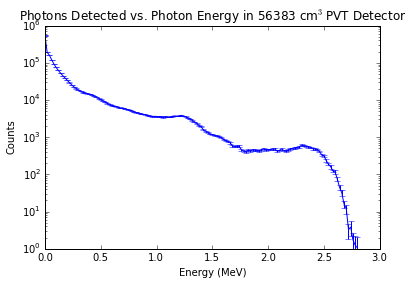

In [39]:
data = pvtdata
plt.errorbar(data[:,0], data[:,1] * photons_in_five_minutes, 
             yerr=photons_in_five_minutes * np.multiply(data[:,2], 
                                                        data[:,1]))
plt.yscale('log')
plt.ylabel("Counts")
plt.xlabel("Energy (MeV)")
plt.title(
    u"Photons Detected vs. Photon Energy in {:0.0f} cm$^3$"
    "PVT Detector".format(5.08 * 60.69 * 182.88))
plt.ylim(1, 1e6)
plt.show()

## NaI Plot

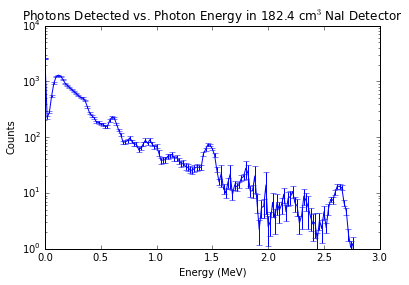

In [40]:
data = naidata
plt.errorbar(data[:,0], data[:,1] * photons_in_five_minutes, 
             yerr=photons_in_five_minutes * np.multiply(data[:,2], 
                                                        data[:,1]))
# plt.plot(data[:,0], data[:,1] * photons_in_five_minutes)
plt.yscale('log')
plt.ylabel("Counts")
plt.xlabel("Energy (MeV)")
plt.title(u"Photons Detected vs. Photon Energy in {:04.1f} cm$^3$"
          "NaI Detector".format(7.62 * np.pi * 7.62))
plt.ylim(1, 1e4)
plt.show()

# Explain the difference in pulse height tallies differences between NaI and PVT and explain the reasons

In [41]:
soildata = np.loadtxt('soil_dist.csv', delimiter=',', skiprows=1)

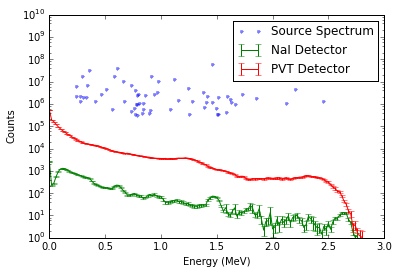

In [42]:
plt.plot(soildata[:,0], 
         soildata[:,1] / np.linalg.norm(soildata[:,1]) * \
         photons_in_five_minutes, '.',
         label="Source Spectrum", alpha=0.5)
plt.errorbar(naidata[:,0], naidata[:,1] * photons_in_five_minutes, 
             yerr=photons_in_five_minutes * np.multiply(naidata[:,2], 
                                                        naidata[:,1]), 
             label="NaI Detector")
plt.errorbar(pvtdata[:,0], pvtdata[:,1] * photons_in_five_minutes, 
             yerr=photons_in_five_minutes * np.multiply(pvtdata[:,2], 
                                                        pvtdata[:,1]), 
             label="PVT Detector")
plt.yscale('log')
plt.legend(loc='upper right')
plt.ylabel("Counts")
plt.xlabel("Energy (MeV)")
plt.ylim(1, 1e10)
plt.show()

The PVT detector had significantly more detections and as a result much smaller errors than the NaI detector. This was likely due to a combination of the following factors: 

- The much larger volume (~300x) of the PVT detector meant that photons were more likely to interact in the PVT, depositing more energy. This was enough to more than overcome the higher density of the NaI detector.
- Related to the larger volume, the PVT detector presented a much larger solid angle to the source than the NaI detector. As a result, the geometric efficiency of the PVT detector was significantly higher.

# Notes

- I did not understand the instruction regarding the minimum energy bin for an F8 tally. As a result, I had counts below the energy of 0 MeV. If I had time to run it again, I would correct this error.
- Due to time constraints I was not able to reduce relative errors in all bins below 10%. Specifically, the high energy photons interacting with the NaI detector still had high relative errors.
- In order to improve the efficiency of the calculation, the importance of the detector and casing cells was set to 10.